### Simulate Distribution

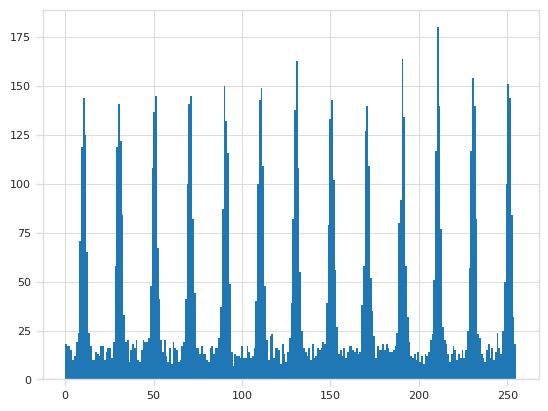

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
import util.plot

util.plot.set_theme(colors=1)

num = 256

p = np.array([math.sin((i*40)/num)**20 + 0.1 for i in range(num)])
p /= p.sum()

_ = plt.hist([np.random.choice([i for i in range(num)], p=p) for _ in range(10000)], bins=num, linewidth=0)

### Evaluate Real World Data (measured from Distributed in KVS)

Array len is: 100000


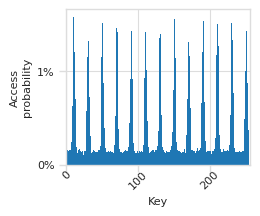

In [9]:
import pathlib
import json
import util.plot
from util.plot import save_plot
import matplotlib.ticker as mticker

util.plot.set_theme(colors=1)

# .tick_params(axis='x', color="grey", labelcolor="black")

arr = json.loads(pathlib.Path("kvs_distribution.json").read_text())
print("Array len is:", len(arr))

fig = plt.figure(figsize=(3.3*0.8, 3.3/1.5))
plt.hist(arr, bins=int(256/1), linewidth=0)
fig.axes[0].set_yticks([0.01 * len(arr) * i for i in range(0, 2)])
fig.axes[0].set_xticks([0, 100, 200])
fig.axes[0].set_xlim(left=0, right=256)
fig.axes[0].set_xlabel("Key")
fig.axes[0].set_ylabel("Access\nprobability")
fig.axes[0].set_xticklabels(fig.axes[0].get_xticklabels(), rotation=45, y=0.05, ha="center")
fig.axes[0].yaxis.set_major_formatter(mticker.PercentFormatter(xmax=len(arr), decimals=0))
fig.tight_layout(w_pad=0, h_pad=0)

save_plot("kvs_access_distribution")